#Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [ ]:
# Read data
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# Apply one-hot encoding to nominal variables
cols_nom = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder()

# Fit on training data
encoder.fit(train_df[cols_nom])

# Transform both training and test datasets
train_encoded = pd.DataFrame(encoder.transform(train_df[cols_nom]).toarray(),
                             columns=encoder.get_feature_names_out())
test_encoded = pd.DataFrame(encoder.transform(test_df[cols_nom]).toarray(),
                            columns=encoder.get_feature_names_out())

# Reset index and merge encoded columns back
train_encoded.reset_index(drop=True, inplace=True)
test_encoded.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.drop(columns=cols_nom, inplace=True)
test_df.drop(columns=cols_nom, inplace=True)

train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)


In [ ]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,31,0,1,1463,23,3,2,0,64,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,933,9,4,3,0,94,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22,0,1,253,11,3,1,1,43,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23,0,1,373,1,2,4,0,47,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,1,528,8,4,3,0,100,3,1,...,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000
1,31,1,1463,23,3,2,0,64,2,2,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
2,41,1,933,9,4,3,0,94,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
3,22,1,253,11,3,1,1,43,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
4,23,1,373,1,2,4,0,47,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,36,2,493,10,2,1,0,42,3,1,...,0.000000,0.449785,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.449785,0.550215
2372,29,1,1250,21,3,1,0,38,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
2373,24,1,688,17,3,2,0,57,3,1,...,0.000000,0.000000,0.0,0.0,0.632241,0.367759,0.0,0.000000,0.632241,0.367759
2374,24,1,1252,11,1,4,1,74,3,1,...,0.585870,0.414130,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000


In [ ]:
# fitting Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG, display

CART = DecisionTreeClassifier()
CART.fit(X_train_resampled, y_train_resampled)

train_score = CART.score(X_train, y_train)
test_score = CART.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.998 and 0.815 over the testing data


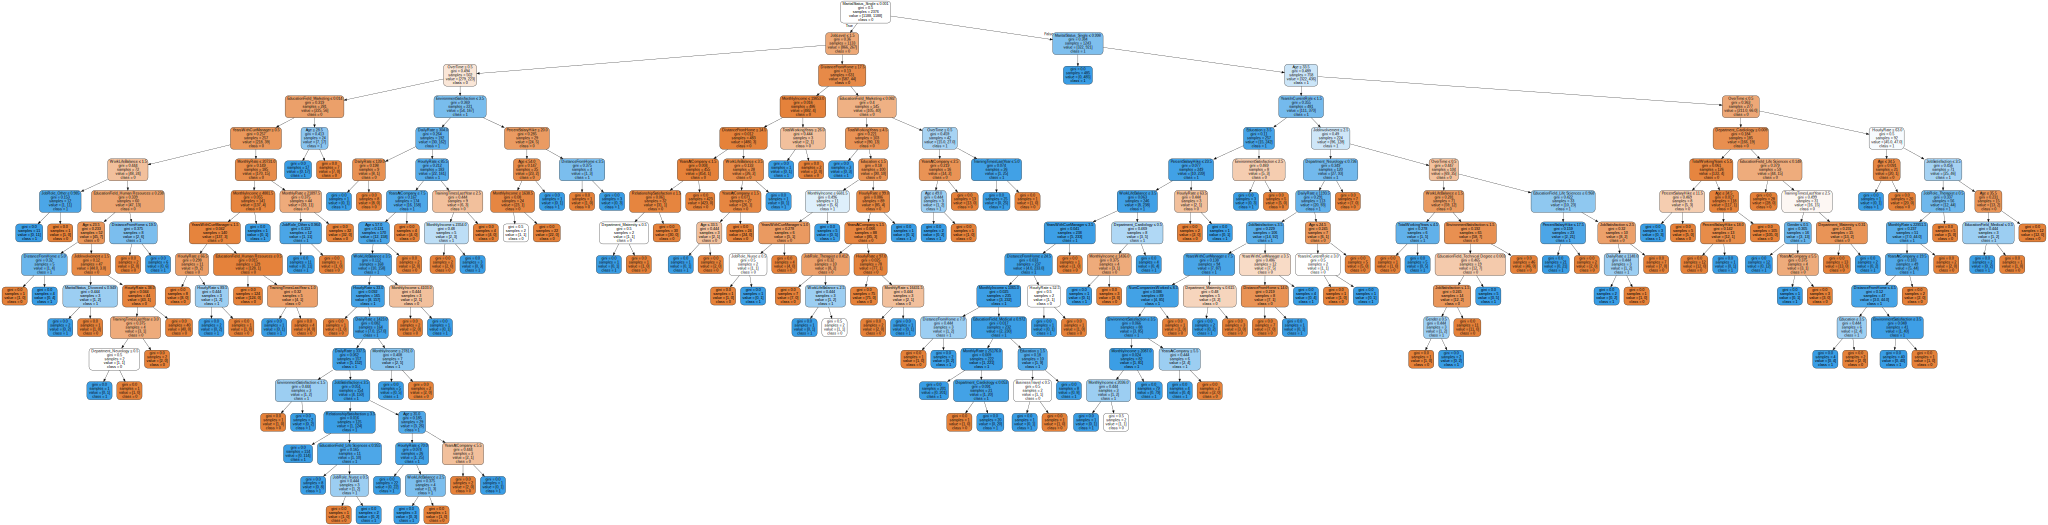

In [ ]:
# Visualize the decision tree
dot_data = Source(export_graphviz(CART, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True))
display(SVG(dot_data.pipe(format='svg')))

In [ ]:
# print out the most important features and their values
feature_importances = CART.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
41             MaritalStatus_Single    0.345497
0                               Age    0.108745
14                         OverTime    0.104203
9                          JobLevel    0.066176
5           EnvironmentSatisfaction    0.029154
22               YearsInCurrentRole    0.028528
30         EducationField_Marketing    0.024917
7                        HourlyRate    0.023733
3                  DistanceFromHome    0.023102
8                    JobInvolvement    0.020043
20                  WorkLifeBalance    0.019745
12                      MonthlyRate    0.018970
2                         DailyRate    0.018204
10                  JobSatisfaction    0.016854
21                   YearsAtCompany    0.016078
11                    MonthlyIncome    0.014291
24             YearsWithCurrManager    0.014179
15                PercentSalaryHike    0.012429
29     EducationField_Life Sciences    0.012203
4                         Education    0

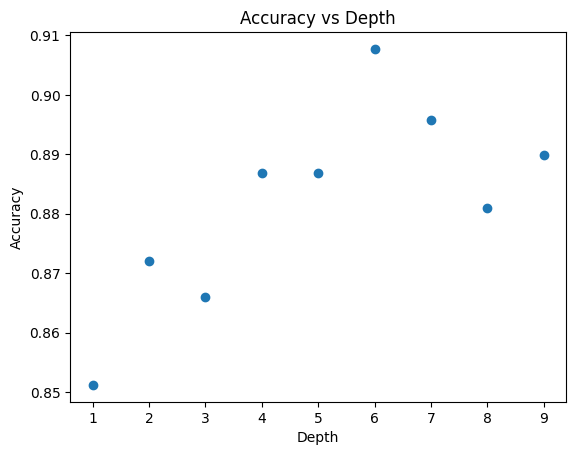

The best performing depth is: 6


In [ ]:
depths = range(1, 10)
accuracy = pd.Series(index=depths, dtype=float)

for depth in depths:
  CART.set_params(max_depth=depth)
  CART.fit(X_train, y_train)
  accuracy[depth] = CART.score(X_test, y_test)

plt.scatter(accuracy.index, accuracy.values)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# The best performing depth
print(f"The best performing depth is: {accuracy.idxmax()}")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 50)
}

# Perform Search
random_search = RandomizedSearchCV(
    estimator= CART,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=1,
    n_jobs=-1,
    return_train_score=True)

# Fit the model
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_dt = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best performance using decision tree is {best_score_dt:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using decision tree is 0.895522388 with a max depth of 4 and a min samples split of 39


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
import xgboost as x
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb = x.XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# print out results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")



Accuracy: 0.9047619047619048
Confusion Matrix:
[[279  10]
 [ 22  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       289
           1       0.71      0.53      0.61        47

    accuracy                           0.90       336
   macro avg       0.82      0.75      0.78       336
weighted avg       0.90      0.90      0.90       336



In [ ]:
# Tune the XGboost
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.9566952675807165


In [ ]:
xgb = x.XGBClassifier(max_depth = 3, learning_rate = 0.2, n_estimators = 100)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# print out results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9107142857142857
Confusion Matrix:
[[282   7]
 [ 23  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       289
           1       0.77      0.51      0.62        47

    accuracy                           0.91       336
   macro avg       0.85      0.74      0.78       336
weighted avg       0.90      0.91      0.90       336



In [ ]:
# print out the most important features and their values
feature_importances = xgb.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
41             MaritalStatus_Single    0.156526
9                          JobLevel    0.091063
0                               Age    0.064176
21                   YearsAtCompany    0.051609
8                    JobInvolvement    0.047182
25            Department_Cardiology    0.046425
31           EducationField_Medical    0.046342
14                         OverTime    0.041571
20                  WorkLifeBalance    0.034018
22               YearsInCurrentRole    0.033751
18                TotalWorkingYears    0.032278
10                  JobSatisfaction    0.031060
29     EducationField_Life Sciences    0.030180
36                    JobRole_Nurse    0.025358
11                    MonthlyIncome    0.025271
24             YearsWithCurrManager    0.024026
5           EnvironmentSatisfaction    0.023901
19            TrainingTimesLastYear    0.022235
26             Department_Maternity    0.021412
27             Department_Neurology    0

In [ ]:
# Use logistic regression with L1 regularization
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train_resampled, y_train_resampled)

logreg.score(X_test, y_test)


0.8928571428571429

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]

}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 1}
Best score: 0.9154294559929236


In [ ]:
# top features
feature_importances = logreg.coef_[0]
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
14                         OverTime    3.305761
41             MaritalStatus_Single    2.635866
37                    JobRole_Other    0.940362
25            Department_Cardiology    0.914343
36                    JobRole_Nurse    0.908308
40            MaritalStatus_Married    0.800730
1                    BusinessTravel    0.639275
30         EducationField_Marketing    0.570042
13               NumCompaniesWorked    0.250942
23          YearsSinceLastPromotion    0.188050
3                  DistanceFromHome    0.084459
33  EducationField_Technical Degree    0.042080
11                    MonthlyIncome    0.000078
12                      MonthlyRate    0.000039
32             EducationField_Other    0.000000
24             YearsWithCurrManager    0.000000
28   EducationField_Human Resources    0.000000
39           MaritalStatus_Divorced    0.000000
26             Department_Maternity    0.000000
35           JobRole_Administrative    0

In [ ]:
logreg = LogisticRegression(penalty='l2', solver='liblinear')
logreg.fit(X_train_resampled, y_train_resampled)

logreg.score(X_test, y_test)

0.8988095238095238

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]

}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 10}
Best score: 0.9107908005307387


In [ ]:
# top features
feature_importances = logreg.coef_[0]
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
14                         OverTime    2.988588
41             MaritalStatus_Single    2.554145
37                    JobRole_Other    1.840313
36                    JobRole_Nurse    1.749454
16                PerformanceRating    1.676711
25            Department_Cardiology    1.637785
30         EducationField_Marketing    0.980925
26             Department_Maternity    0.911764
33  EducationField_Technical Degree    0.820820
40            MaritalStatus_Married    0.776060
27             Department_Neurology    0.748311
1                    BusinessTravel    0.707802
28   EducationField_Human Resources    0.638246
32             EducationField_Other    0.476957
29     EducationField_Life Sciences    0.337775
13               NumCompaniesWorked    0.252024
23          YearsSinceLastPromotion    0.164583
3                  DistanceFromHome    0.087737
31           EducationField_Medical    0.043138
38                JobRole_Therapist    0